In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']= 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
sr = pd.Series([90, 90, 55, 60, 76, 80, 76, 88, 30, 25], name='국어점수')
sr.index=['홍길동', '이순신', '임꺽정', '정난정', '이이', '이황', '정도전', '김철수1', '김철수2', '김철수3']

In [4]:
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

In [5]:
# 1. 국어점수가 가장큰값을 구하시요
sr.max()

90

In [6]:
# 2. 국어점수가 가장큰값의 이름을 구하시오

for i in range(len(sr)):
    if sr[i]==sr.max():
        print(sr.index[i])


홍길동
이순신


In [7]:
# for i in range(len(sr)):
#     if sr[i]>80:
#         print(sr.index[i])
        
# 3. 국어점수가 80점이상인 값을 구하시오
sr[sr>80].values

array([90, 90, 88], dtype=int64)

In [8]:
# 4. 국어 점수가 50점이상 80점이하인 값을 구하시오
sr[(sr<=80)&(sr>=50)].values

array([55, 60, 76, 80, 76], dtype=int64)

In [9]:
# 5. 이름이 김으로 시작하는 데이터를 구하시오
sr[sr.index.str.contains('^김')]

김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

In [10]:
# 6. 이름순으로 정렬하시요
sr.sort_index(ascending=True)

김철수1    88
김철수2    30
김철수3    25
이순신     90
이이      76
이황      80
임꺽정     55
정난정     60
정도전     76
홍길동     90
Name: 국어점수, dtype: int64

In [11]:
# 7. 키보드로 입력받아 검색된 이름의 점수를 구하시오
search_name = input("이름 : ")
sr[search_name]


이름 : 홍길동


90

In [9]:
# 8. 데이터를 다음과 같이 출력하시오
# (0~59:F , 60~69:D, 70~79:C, 80~89:B, 90~100:A
# ------------------------
#     이름    국어   학점
# ------------------------
#     홍길동  70     C
#     ...
#     김철수3 25     F

score = pd.cut(sr, [-1,59,69,79,89,100], labels=['F','D','C', 'B', 'A'])

print('이름', '국어', '학점', sep='\t')
print('='*20)
for n, k, g in zip(sr.index, sr.values, score.values):
    print(n, k, g, sep='\t')
# DataFrame
# sr.values
# pd.DataFrame({'이름': sr.index, '국어':sr.values, '학점':score.values}, columns=['이름', '국어','학점'])

이름	국어	학점
홍길동	90	A
이순신	90	A
임꺽정	55	F
정난정	60	D
이이	76	C
이황	80	B
정도전	76	C
김철수1	88	B
김철수2	30	F
김철수3	25	F


In [13]:
# 9. 국어 점수 100점이하는 가산점10를 부여하고
#    국어 점수 70점이하는 가산점20를 부여하고
#    국어 점수 50점이하는 가산점30를 부여하시오
def plus(v):
    if v<=50:
        return v + 30
        
    elif v <=70:
        return v + 20
    
    else:
        return v + 10
    
sr.apply(plus)


홍길동     100
이순신     100
임꺽정      75
정난정      80
이이       86
이황       90
정도전      86
김철수1     98
김철수2     60
김철수3     55
Name: 국어점수, dtype: int64

In [14]:
# 10. 국어점수 25%~75% 사이에 해당하는 값을 구하시오
# sr.quantile([0.25, 0.75])
# sr.quantile([0.75])

# # print(sr[0])
for i in range(len(sr)):
    if (sr[i]< sr.quantile([0.75]).values[0]) & (sr[i]>sr.quantile([0.25]).values[0]):
        print(sr[i])
# sr.quantile([0.75]).values[0]

60
76
80
76


In [15]:
# 11. 각 국어점수에 대한 갯수 를 구하시오
sr.value_counts().sort_index(ascending=False)


90    2
88    1
80    1
76    2
60    1
55    1
30    1
25    1
Name: 국어점수, dtype: int64

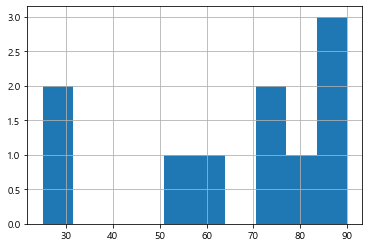

In [24]:
# 12. 국어 점수를 10개로 분할한 경우 각 점수별 도수를 구하고 도수분포표를 그리시요
# pd.cut(sr,[-1,10,20,30,40,50,60,70,80,90,100]).value_counts().plot(kind='bar')
pd.cut(sr, 10).value_counts()
sr.hist(bins=10)
plt.show()


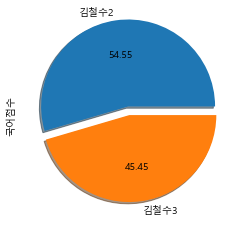

In [32]:
# under50_name = sr[sr.values<=50].index

# under50_score = []
# for i in sr.values:
#     if i<=50:
#         under50_score.append(i)
        
# plt.pie(under50_score,labels=under50_name, shadow=True, startangle=90)
# plt.show()

# sr.values<=50

sr[sr<=50].plot(kind='pie', autopct='%.2f', shadow=True, explode=[0.1,0])
plt.show()

In [35]:
# 14. 아래처럼 출력하시요
# (힌트: 성과 이름이 분리된 시리즈를 구하고 zip 을이용 )
# ------------------------
#   성     이름    국어
# ------------------------
#   홍     길동    70 
#     ...
#   김     철수3   25    
# last_name = sr.index.str[0]
# first_name = sr.index.str[1:]

# last_name_list = []
# first_name_list = []
# score_list = []

# for a,b,c in zip(last_name, first_name, sr.values):
#     last_name_list.append(a)
#     first_name_list.append(b)
#     score_list.append(c)

# pd.DataFrame({'성':last_name_list, '이름':first_name_list, '국어':score_list}, columns=['성','이름', '국어'])
print('-'*20)
print('성', '이름', '국어', sep='\t')
print('-'*20)
for a, b, c in zip(sr.index.str[0], sr.index.str[1:], sr.values):
    print(a, b, c, sep='\t')

--------------------
성	이름	국어
--------------------
홍	길동	90
이	순신	90
임	꺽정	55
정	난정	60
이	이	76
이	황	80
정	도전	76
김	철수1	88
김	철수2	30
김	철수3	25
